# Code 

*Note: this notebook should be converted to PDF with the following command:*

```
nbpublish -pdf -lb <notebook-name>.ipynb -f nbpublish_config.json
```


*You have to install [IPyPublish](https://ipypublish.readthedocs.io/en/latest/index.html) first. Also note that this cell will not be part of the output since it contains the metadata tag `ignore=True`.*

## Imports

In [137]:
# https://stackoverflow.com/a/39566040/11552622
rcparams = {
    'axes.titlesize':13,
    'axes.labelsize':9,
    'xtick.labelsize':8,
    'ytick.labelsize':8
}

In [166]:
from ipypublish import nb_setup
plt = nb_setup.setup_matplotlib(output=('pdf','svg'), rcparams=rcparams)
pd = nb_setup.setup_pandas(escape_latex=False)
pd.set_option('precision', 2)

In [183]:
import numpy as np
import seaborn as sns
import numpy as np

## Setup paths

In [12]:
# Define paths
filename_table = 'table.csv'
filename_exact = 'Xexact.csv'
filename_pred = 'Xpredicted.csv'
filename_Y = 'Ytest.txt'
filename_Ypred = 'Ytestpred.txt'
results_folders_LVAD = {
    4000: '/media/maousi/Data/tmp/simulations_2020_03_21/results/',
    5000: '/media/maousi/Data/tmp/simulation_LVAD_RPM5000_2020_04_21/results/'
}

## Utility functions

### Results table

In [164]:
# Define utility function to format results table
def format_table(table):
    table.index = [
        'MinExact', 'MaxExact',
        'MeanExact', 'SDexact',
        'MinPredicted', 'MaxPredicted',
        'MeanPredicted', 'SDpredicted',
        'meanErrorMatrix', 'meanRelErrorMatrix*100',
        'SDErrorMatrix', 'CImin',
        'CImax',
    ]
    table.columns = [
        'HR','SAPM','SAPS','SAPD',
        'PAPM','PAPS','PAPD','LVEF',
        'LVEDV', 'LVESV', 'CI', 'PCPW'
    ]
    table.loc['meanRelErrorMatrix*100', :] = table.loc['meanRelErrorMatrix*100', :] * 100

In [13]:
# Load the table, format it and return it
def get_results_table(RPM):
    df = pd.read_csv(results_folders_LVAD[RPM]+filename_table, header=None)
    format_table(df)
    return df

### DNN performance

In [21]:
def load_Ys(RPM):
    Ytest = pd.read_csv(results_folders_LVAD[RPM]+filename_Y, sep=' ', header=None)
    Ytestpred = pd.read_csv(results_folders_LVAD[RPM]+filename_Ypred, sep=' ', header=None)
    return Ytest, Ytestpred

In [155]:
def plot_dnn_performance(RPM):
    params = [r'$E_{max,lv}$', r'$E_{max,lv,0}$',
              r'$G_{E_{max,lv}}$', r'$k_{E,lv}$']
    fig, ax = plt.subplots(2, 2, figsize=(10,6))
    Ytest, Ypred = load_Ys(RPM)
    
    for i,a in enumerate(ax.ravel()):
        a.scatter(Ytest.loc[:, i], Ypred.loc[:, i], s=3)
        a.set_title(params[i])
        a.set_xlabel(r'Exact')
        a.set_ylabel(r'Predicted')
    
    offset = .0005
    ax[1, 1].set_xlim([Ytest.loc[:, 3].min()-offset, Ytest.loc[:, 3].max()+offset])
    ax[1, 1].set_ylim([Ypred.loc[:, 3].min()-offset, Ypred.loc[:, 3].max()+offset])
    
    plt.subplots_adjust(wspace=0.3, hspace=.5)
    
    return
    axs[0, 0].scatter(Ytest[:, 0], Ypred[:, 0])
    axs[0, 0].set_title(r'Left Ventricle $E_{meax,0}$')
    axs[0, 0].set_xlabel('real parameter')
    axs[0, 0].set_ylabel('predicted parameter')
    axs[0, 1].scatter(Ytest[:, 1], Ypred[:, 1])
    axs[0, 1].set_title('Left Ventricle $E_{max,Ref,0}')
    axs[0, 1].set_xlabel('real parameter')
    axs[0, 1].set_ylabel('predicted parameter')
    axs[1, 0].scatter(Ytest[:, 2], Ypred[:, 2])
    axs[1, 0].set_title('Left Ventricle AGain_Emax')
    axs[1, 0].set_xlabel('real parameter')
    axs[1, 0].set_ylabel('predicted parameter')
    axs[1, 1].scatter(Ytest[:, 3], Ypred[:, 3])
    axs[1, 1].set_title('Left Ventricle kE')
    axs[1, 1].set_xlabel('real parameter')
    axs[1, 1].set_ylabel('predicted parameter')
    #axs[1, 1].set_xlim(normdata['parammins'][3], normdata['parammaxs'][3])
    #axs[1, 1].set_ylim(normdata['parammins'][3], normdata['parammaxs'][3])

# Introduction

## Aim

Compare predicted vs exact hemodynamics quantities for different RPM levels of the Heart Mate III device.

## Methods

### Cardiovascular system model

Simulations were performed on the models:

* `Ursino1998Model_VAD2`, which models the cardiovascular system with the Heart Mate III device
* `Ursino1998Model`, which is the model without the LVAD



### Deep neural network

The number of layers and the number of neurons per layer was kept unchanged, i.e. the neural network was composed of 4 *relu* hidden layers of 16 neurons each.

# Results

## RPM = 4000

Those results were already obtained, we included them here for the sake of completeness.


In [167]:
rpm4000 = get_results_table(4000)
rpm4000

HR   SAPM    SAPS   SAPD   PAPM   PAPS   PAPD  \
MinExact                60.00  72.99   88.17  65.32  16.17  27.55  10.45   
MaxExact                78.95  99.16  134.78  81.35  22.39  31.69  17.74   
MeanExact               66.69  89.76  119.94  74.67  18.42  29.18  13.04   
SDexact                  3.87   5.53    9.69   3.54   1.19   0.78   1.40   
MinPredicted            60.00  72.69   87.42  64.03  16.12  27.51  10.41   
MaxPredicted            83.33  99.34  135.00  81.52  22.75  31.95  18.14   
MeanPredicted           66.69  89.79  119.85  74.75  18.39  29.16  13.01   
SDpredicted              4.14   6.01   10.58   3.83   1.29   0.85   1.52   
meanErrorMatrix          0.64   0.56    1.00   0.40   0.13   0.11   0.15   
meanRelErrorMatrix*100   0.95   0.65    0.88   0.55   0.71   0.37   1.16   
SDErrorMatrix            1.24   0.51    1.01   0.33   0.12   0.09   0.14   
CImin                    0.53   0.52    0.91   0.38   0.12   0.10   0.14   
CImax                    0.75   0.61    1.09   0.43   0.14   0.12   0.17   

                         LVEF   LVEDV   LVESV    CI   PCPW  
MinExact                33.73  134.31   48.47  0.83   5.98  
MaxExact                63.91  200.82  132.10  2.37  14.04  
MeanExact               53.40  157.20   74.11 -1.90   9.00  
SDexact                  6.57   14.55   17.29  0.32   1.61  
MinPredicted            32.87  134.09   48.26  0.75   5.93  
MaxPredicted            64.48  208.90  139.54  2.39  14.63  
MeanPredicted           53.50  157.72   74.35 -1.89   8.97  
SDpredicted              7.13   16.00   19.03  0.35   1.75  
meanErrorMatrix          0.71    1.50    1.81  0.04   0.17  
meanRelErrorMatrix*100   1.41    0.91    2.30  2.44   1.85  
SDErrorMatrix            0.61    1.60    1.90  0.04   0.14  
CImin                    0.66    1.36    1.64  0.04   0.16  
CImax                    0.76    1.64    1.98  0.04   0.18

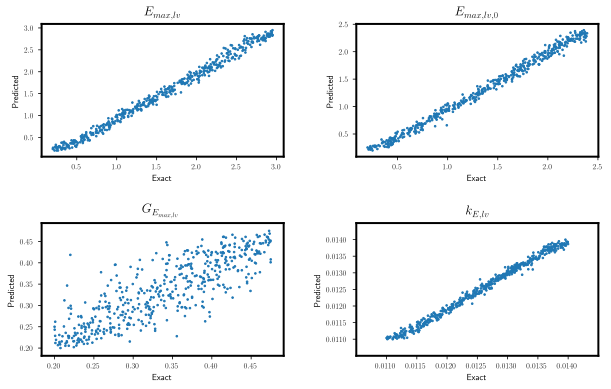

In [157]:
plot_dnn_performance(4000)

## RPM = 5000

In [168]:
rpm5000 = get_results_table(5000)
rpm5000

HR   SAPM    SAPS   SAPD   PAPM   PAPS   PAPD  \
MinExact                62.50  77.40   84.84  73.68  15.36  26.93   9.56   
MaxExact                86.79  96.67  127.22  81.39  18.40  29.70  12.76   
MeanExact               70.92  89.18  111.35  78.09  16.66  27.94  11.03   
SDexact                  6.10   4.67   10.06   2.09   0.68   0.58   0.74   
MinPredicted            62.50  77.47   84.93  73.74  15.27  26.89   9.45   
MaxPredicted            85.08  97.06  128.54  81.60  18.41  29.76  12.73   
MeanPredicted           70.82  89.11  111.15  78.09  16.67  27.96  11.02   
SDpredicted              6.00   4.94   10.73   2.16   0.72   0.63   0.78   
meanErrorMatrix          0.93   0.40    0.96   0.15   0.06   0.07   0.06   
meanRelErrorMatrix*100   1.28   0.45    0.89   0.19   0.37   0.24   0.59   
SDErrorMatrix            1.80   0.33    0.83   0.13   0.04   0.06   0.05   
CImin                    0.77   0.37    0.89   0.14   0.06   0.06   0.06   
CImax                    1.09   0.43    1.03   0.16   0.06   0.07   0.07   

                         LVEF   LVEDV   LVESV    CI  PCPW  
MinExact                40.27  120.10   38.95  0.00  5.05  
MaxExact                67.82  180.88  105.52  1.63  9.64  
MeanExact               55.14  141.97   64.40 -0.91  6.86  
SDexact                  6.95   12.41   15.12  0.41  1.03  
MinPredicted            40.12  120.07   38.70  0.00  4.92  
MaxPredicted            68.13  183.70  107.11  1.69  9.66  
MeanPredicted           55.34  141.66   64.07 -0.91  6.88  
SDpredicted              7.31   13.45   16.04  0.44  1.09  
meanErrorMatrix          0.65    1.40    1.44  0.04  0.09  
meanRelErrorMatrix*100   1.21    0.97    2.26  7.44  1.29  
SDErrorMatrix            0.59    1.13    1.20  0.03  0.07  
CImin                    0.60    1.30    1.33  0.03  0.08  
CImax                    0.70    1.50    1.54  0.04  0.10

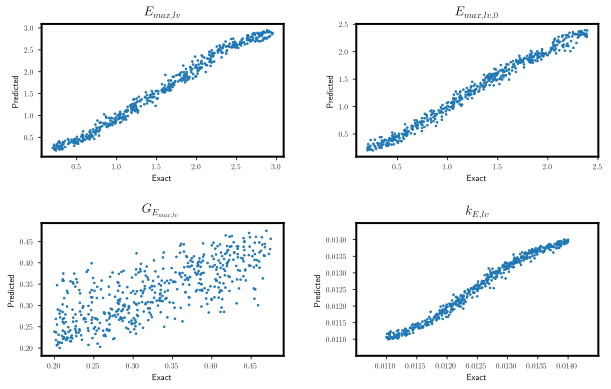

In [159]:
plot_dnn_performance(5000)

## RPM = 6000

## Hemodynamic quantities

In [181]:
def load_X_data(RPM):
    Xhat = pd.read_csv(results_folders_LVAD[RPM]+filename_pred, header=None)
    X = pd.read_csv(results_folders_LVAD[RPM]+filename_exact, header=None)
    # Format columns
    cols = [
        'HR','SAPM','SAPS','SAPD',
        'PAPM','PAPS','PAPD','LVEF',
        'LVEDV', 'LVESV', 'CI', 'PCPW'
    ]
    Xhat.columns = cols
    X.columns = cols
    # Take abs (values of cardiac index are negative)
    X.CI = X.CI.apply(np.abs)
    Xhat.CI = Xhat.CI.apply(np.abs)
    # Join
    return X.join(Xhat, rsuffix='_hat')

In [185]:
X4000 = load_X_data(4000)
X5000 = load_X_data(5000)

In [186]:
X4000['RPM'] = 4000
X5000['RPM'] = 5000

In [189]:
data = pd.concat([X4000, X5000])

In [195]:
def plt_compare(data, col, ax, legend=None):
    # Plot identity line
    coord1 = min(data[col].min(), data[col+'_hat'].min())
    coord2 = max(data[col].max(), data[col+'_hat'].max())
    ax.plot([coord1, coord2], [coord1, coord2], '--k')
    # Scatter plot predicted vs exact
    sns.scatterplot(x=col, y=col+'_hat', data=data, ax=ax, hue='RPM', legend=legend)
    ax.set_ylabel('r')

In [192]:
cols = [
    'HR','SAPM','SAPS','SAPD',
    'PAPM','PAPS','PAPD','LVEF',
    'LVEDV', 'LVESV', 'CI', 'PCPW'
]

In [197]:
fig, ax = plt.subplots(4, 3, figsize=(12, 15))
axlst = ax.ravel()

for i, col in enumerate(cols):
    plt_compare(data, col, axlst[i], 'full' if i == 0 else None)
plt.subplots_adjust(wspace=.3, hspace=.3)
sns.despine()

# Appendix

## Parameters of the model

The two models used, `Ursino1998Model_VAD2` and `Ursino1998Model`, extend the model `ModelParametersNH` that defines all the parameters.

In [3]:
filepath = '../modelica/original/Mathcard.mo'

In [4]:
with open(filepath, 'r') as f:
    filecontent = f.read()

In [11]:
model_start = "model ModelParametersNH"
model_end = "end ModelParametersNH;"

In [84]:
# All parameters have the same name format: Param_XXX
params = []
reading_model = False
for line in filecontent.split('\n'):
    # Remove any indentation
    line = line.strip()
    if line == model_start:
        reading_model = True
    elif line == model_end:
        reading_model = False
    elif reading_model:
        params.append(line)
    # else: outside the model...
print(len(params))
print('\n'.join(params))

117
parameter Real Param_LeftAtrium_C = 19.23;
parameter Real Param_LeftAtrium_V0(unit = "ml") = 25;
parameter Real Param_LeftAtrium_Vu0(unit = "ml") = 25;
parameter Real Param_MitralicValve_R(unit = "mmHg.s2/ml") = 2.5 * 0.001;
parameter Real Param_LeftVentricle_V0(unit = "ml") = 16.77;
parameter Real Param_LeftVentricle_kR(unit = "s/ml") = 3.75 * 0.0001;
parameter Real Param_LeftVentricle_Emax0 = 2.95;
parameter Real Param_LeftVentricle_EmaxRef0 = 2.392;
parameter Real Param_LeftVentricle_AGain_Emax = 0.475;
parameter Real Param_LeftVentricle_ADelay_Emax = 2;
parameter Real Param_LeftVentricle_ATau_Emax = 8;
parameter Real Param_LeftVentricle_P0(unit = "mmHg") = 1.5;
parameter Real Param_LeftVentricle_kE(unit = "1/ml") = 0.014;
parameter Real Param_LeftVentricle_TSys0(unit = "s") = 0.5;
parameter Real Param_LeftVentricle_kSys(unit = "s2") = 0.075;
parameter Real Param_LeftVentricle_TRef0 = 0.58;
parameter Real Param_LeftVentricle_AGain_Ts = -0.13;
parameter Real Param_LeftVentricle_A